In [1]:
import pickle
import pandas as pd
import partial_dependence as pdp_plot
import numpy as np

In [2]:
root_sentiero = "example_data"
dfTest = pd.read_csv(root_sentiero+"/test.csv")

ground_truth_column = "label"
features = [x for x in list(dfTest.columns) if x not in [ground_truth_column]]

dfTest = dfTest[features]

name = "rf"
fileobj = open( root_sentiero+"/"+name+".pkl", "rb" )

pickle_model = pickle.load( fileobj )

chosen_feature = "alcohol"
ch_numSamples = 100
ch_clustNumber = 10
ch_scale = np.array(pickle_model["scale"])
ch_shift = np.array(pickle_model["shift"])
model = pickle_model["model"]
labels_name = ["good\nwine","bad\nwine"]
labels_focus = labels_name[0]

In [3]:
# initialization
wine_pdp_plot = pdp_plot.PartialDependence(dfTest,
                  model,
                  labels_name,
                  labels_focus,
                  ch_numSamples,
                  ch_scale,
                  ch_shift)


In [4]:
# for each istance in test set,
# creating a different versions for each different value from the feature samples
the_matrix = wine_pdp_plot.pdp(chosen_feature)


In [5]:
# computing predictions for each of those different versions of vectors
preds = wine_pdp_plot.pred_comp_all(the_matrix)



In [6]:
# computing the clustering using the distances among the different prediction curves
labels_clust = wine_pdp_plot.compute_clusters(preds,ch_clustNumber)


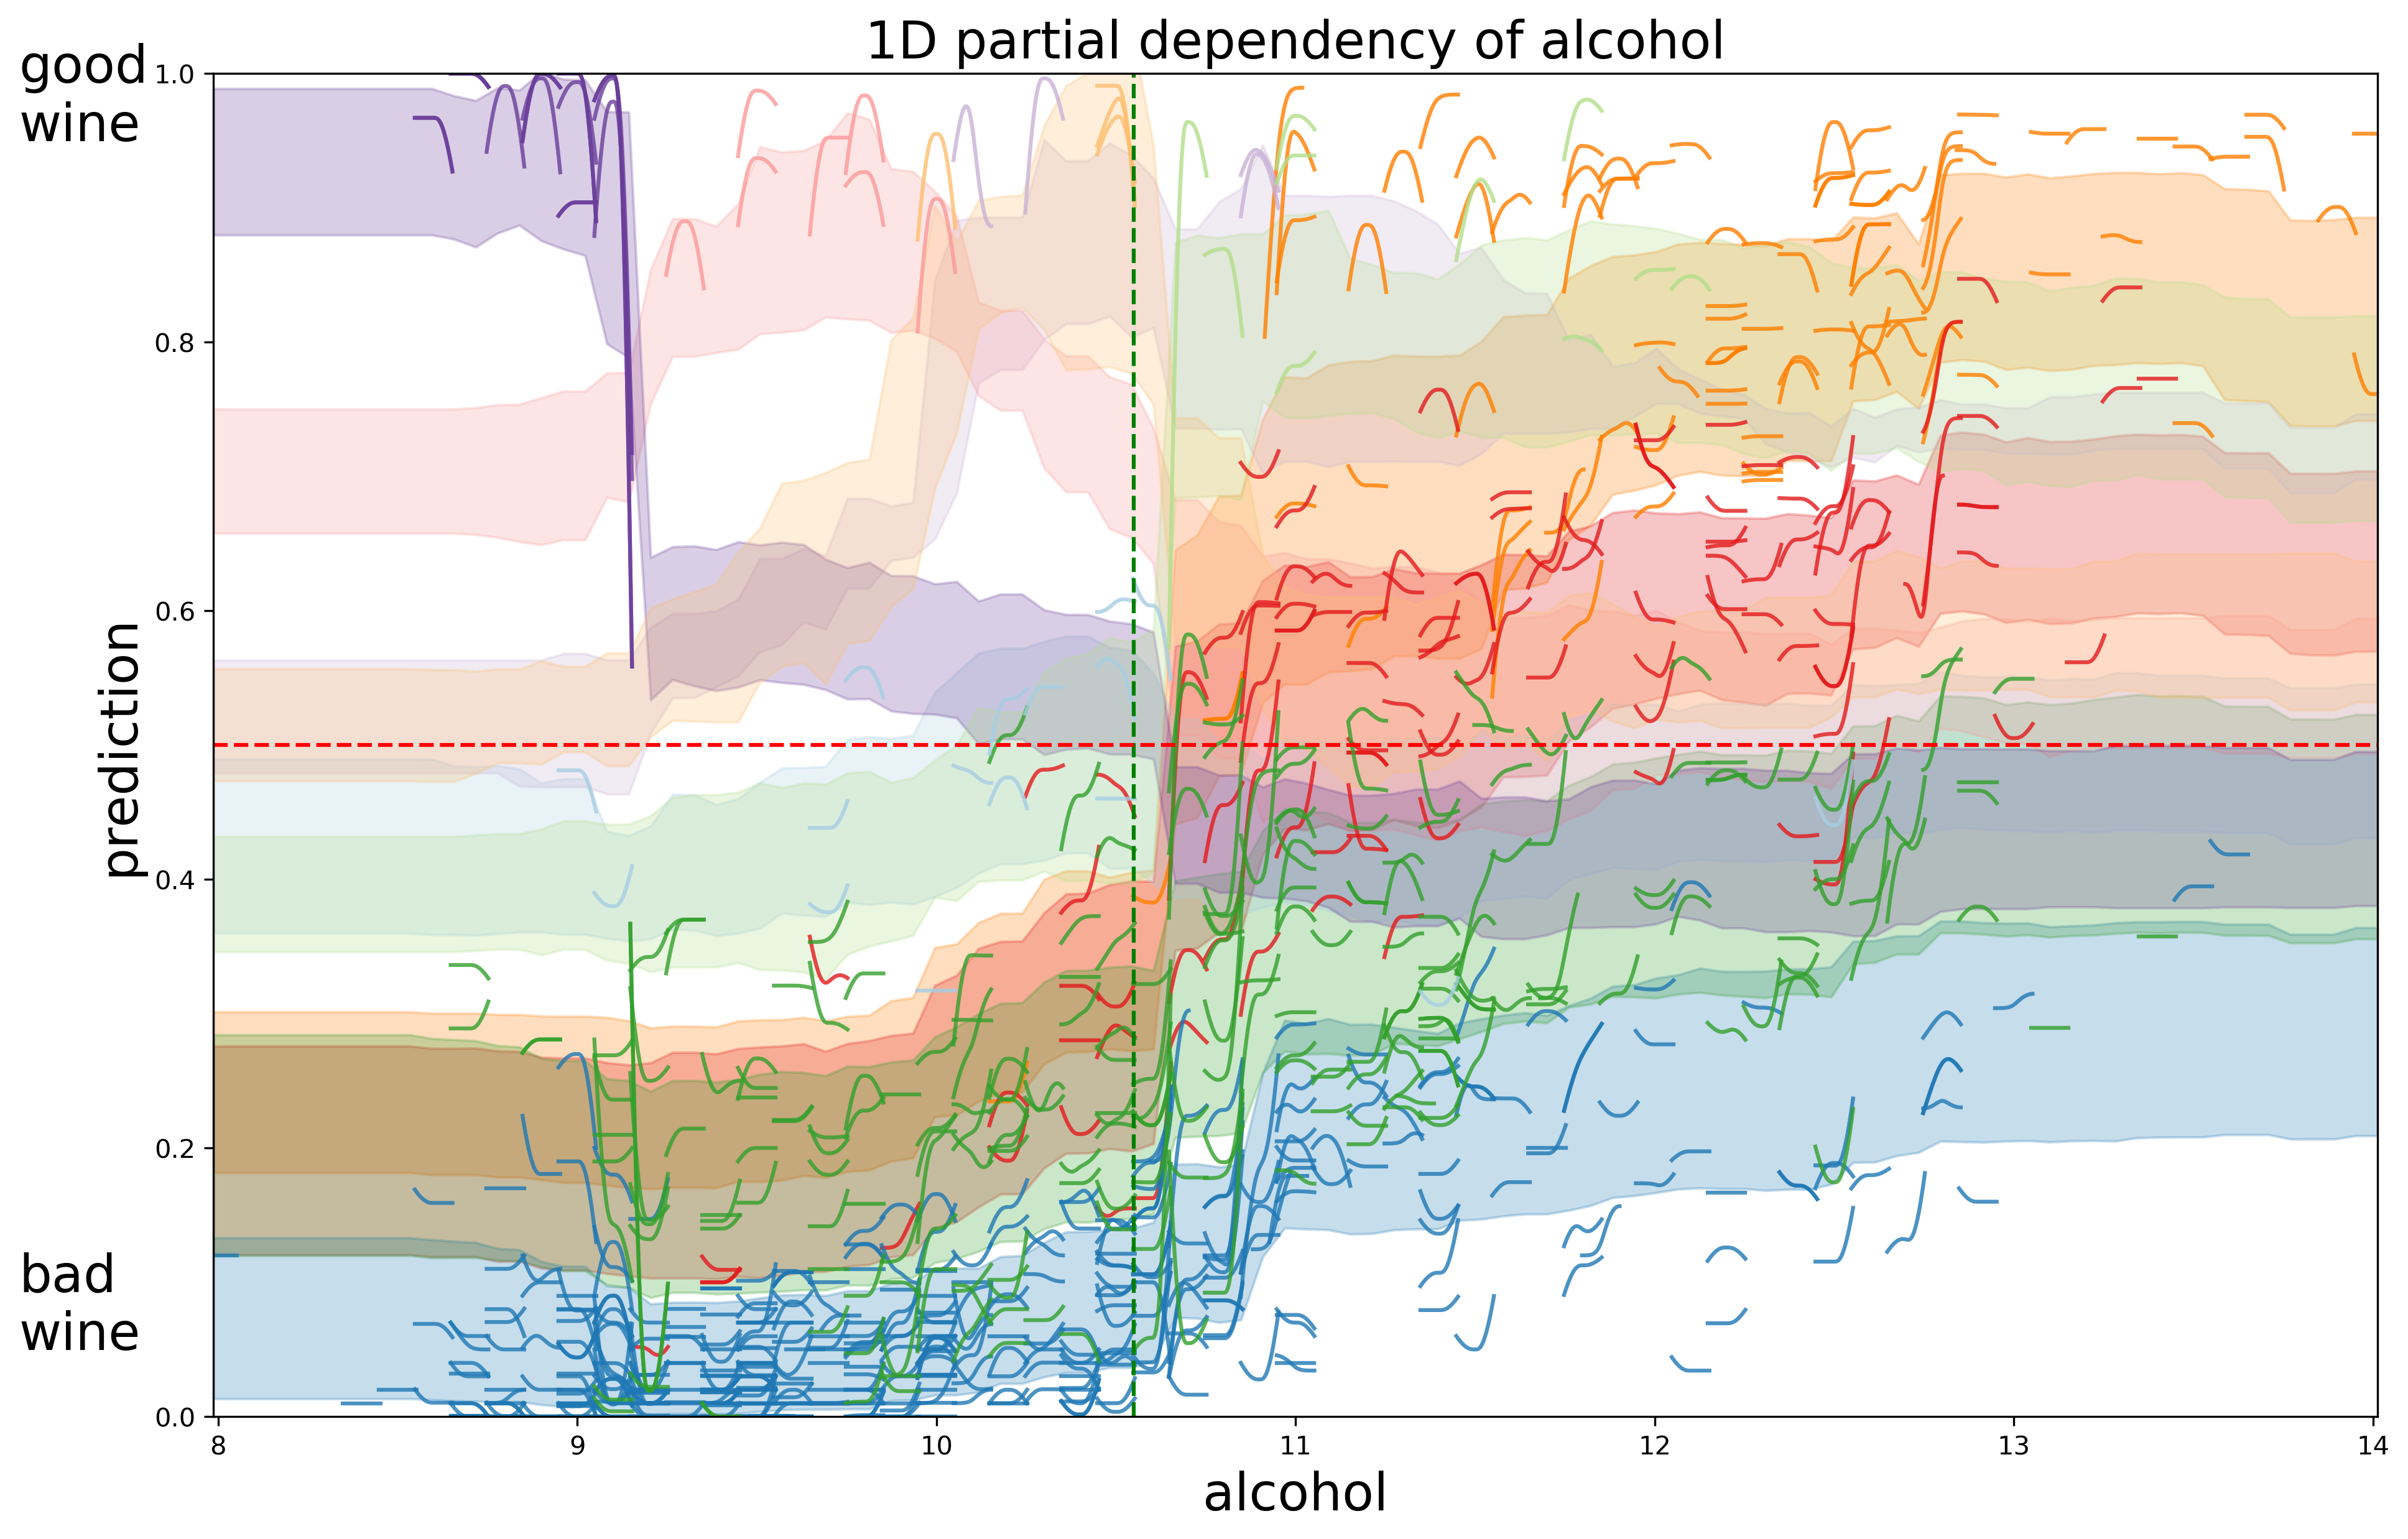

In [7]:
# plotting all we got
wine_pdp_plot.plot(preds,labels_clust)

             


In [8]:
#using all possible default arguments
# if scale and shift are default = None 
# then we have to provide directly the normalized data 

dfTest_matrix = (dfTest.as_matrix() + ch_shift)*ch_scale
normalized_df = pd.DataFrame(dfTest_matrix)
normalized_df.columns = dfTest.columns

# this time we will use the DTW (LB Keogh) distance instead of the simple RMSE
lb_k = True

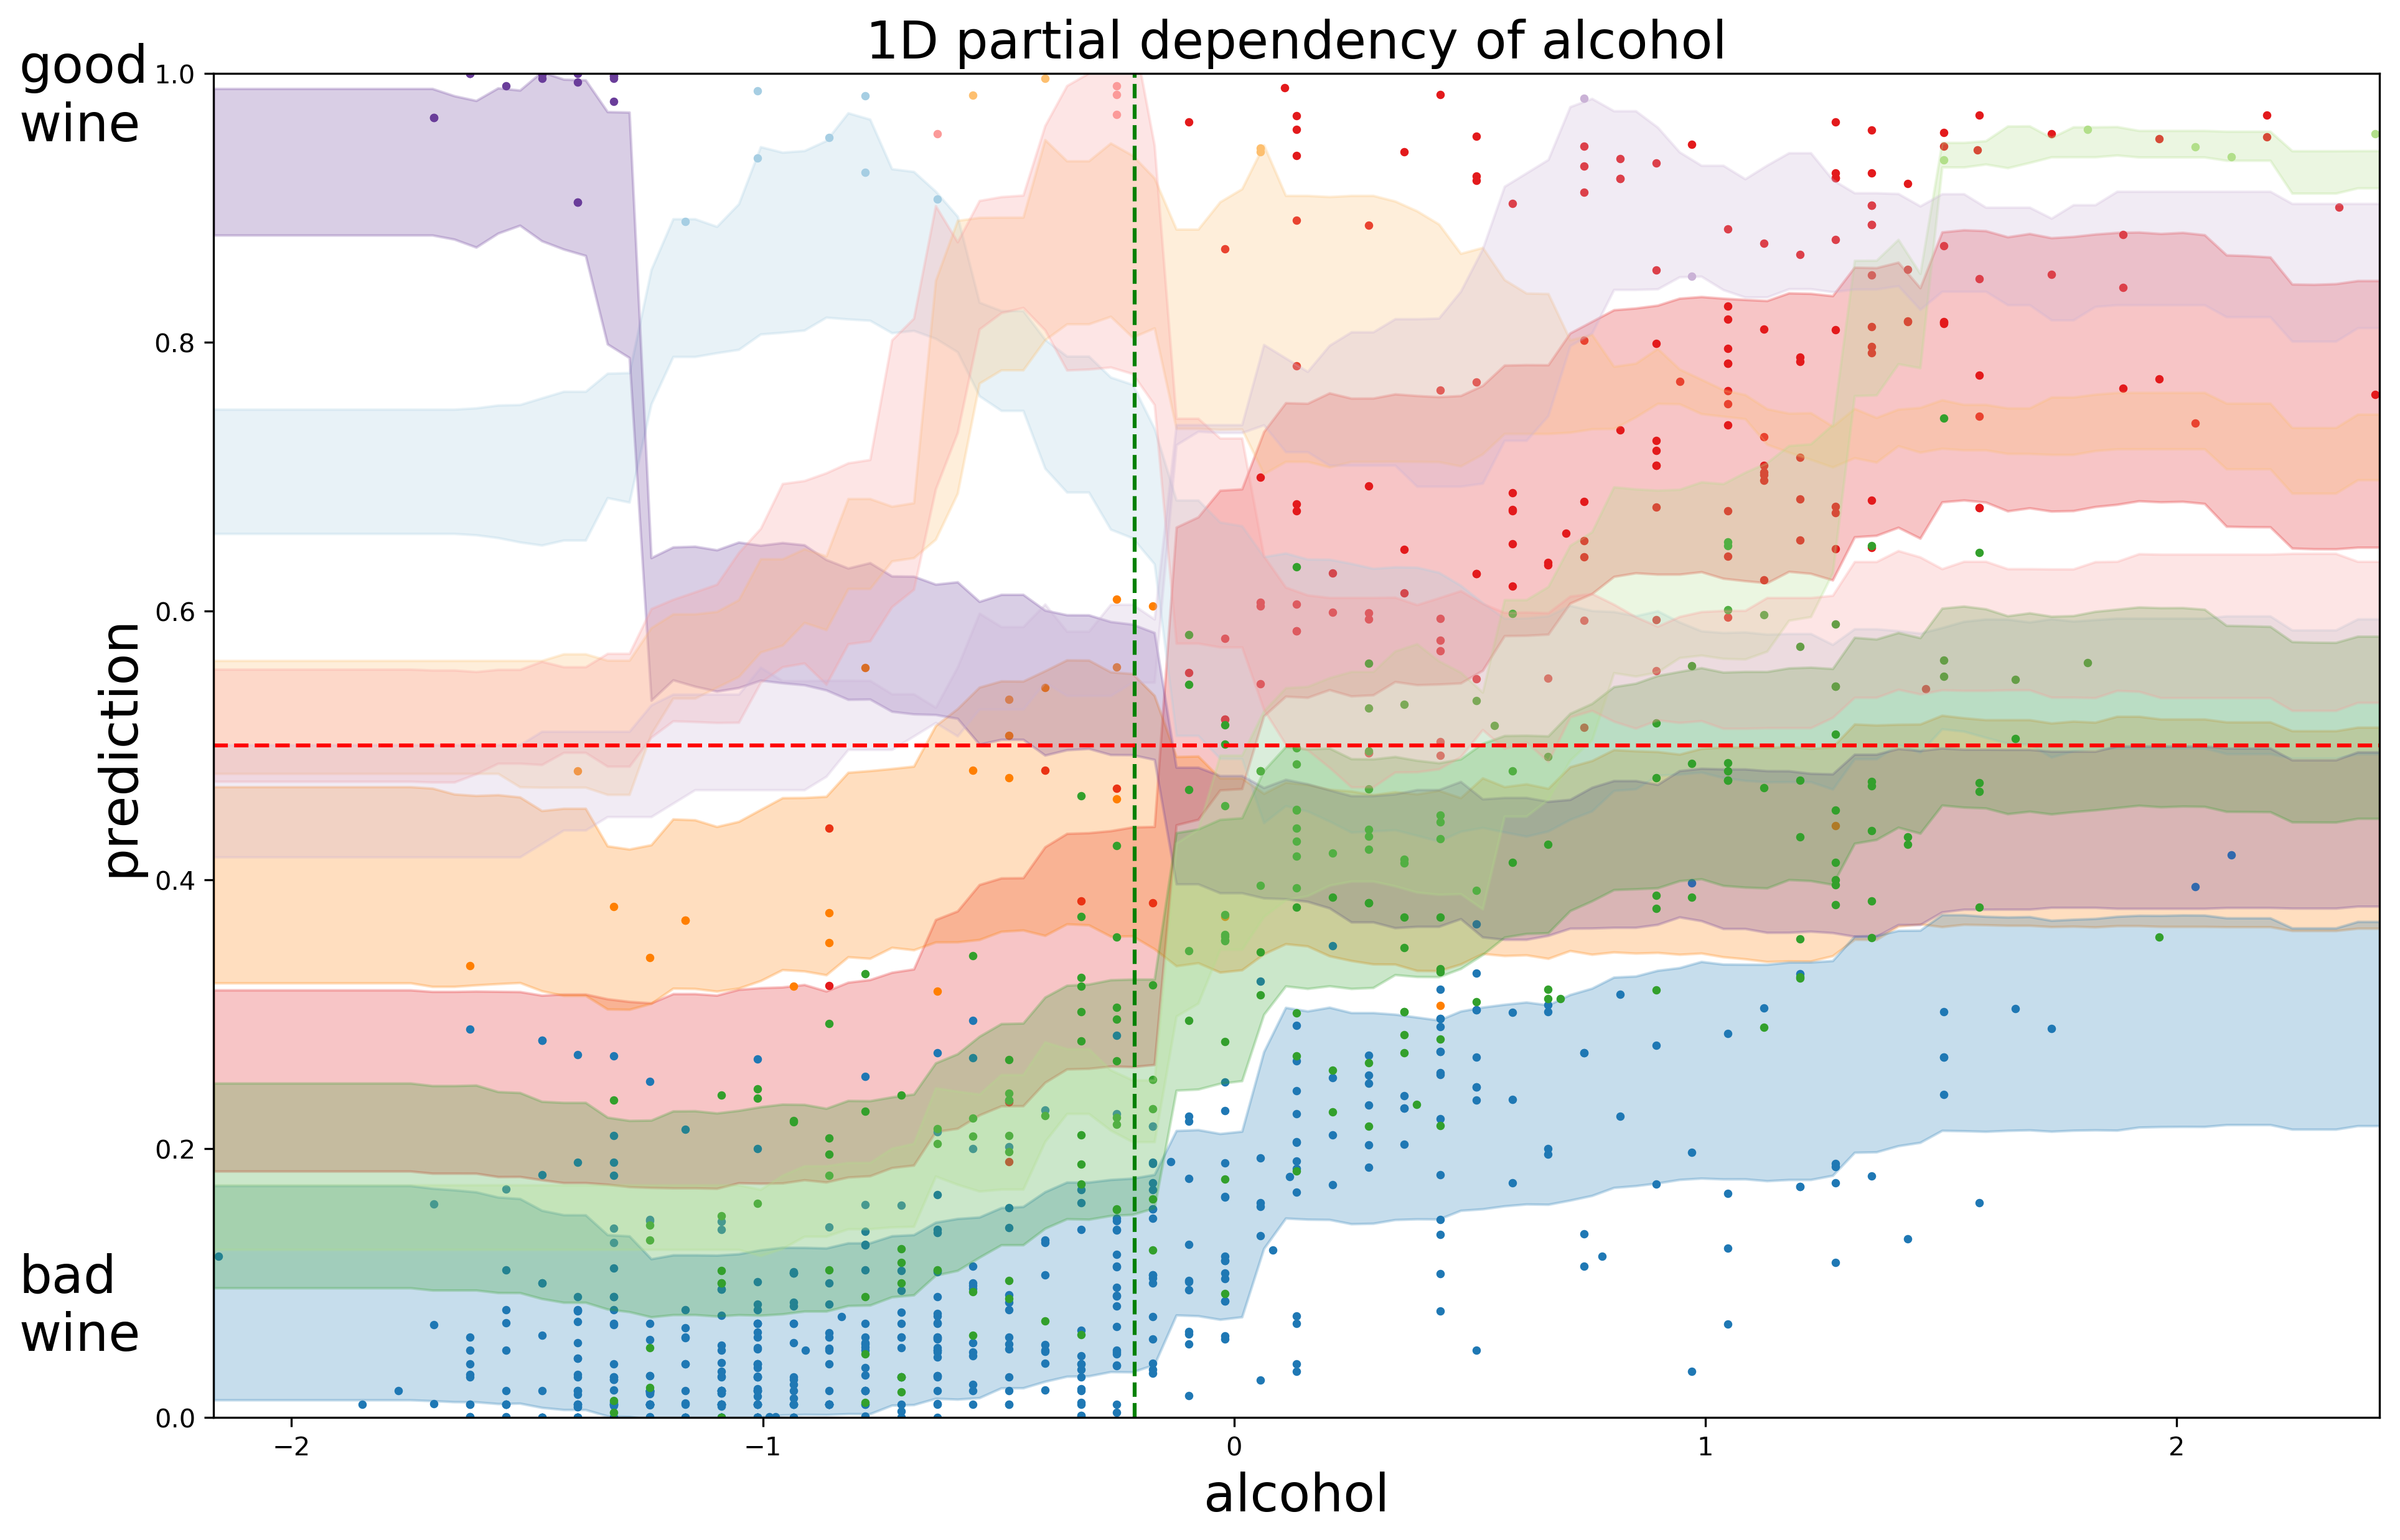

In [10]:
# initialization
wine_pdp_plot = pdp_plot.PartialDependence(normalized_df,
                                      model,
                                      labels_name,
                                      labels_focus)


# for each istance in test set,
# creating a different versions for each different value from the feature samples
the_matrix = wine_pdp_plot.pdp(chosen_feature)


# computing predictions for each of those different versions of vectors
preds = wine_pdp_plot.pred_comp_all(the_matrix)



# computing the clustering using the distances among the different prediction curves using DTW
labels_clust = wine_pdp_plot.compute_clusters(preds,ch_clustNumber,lb_keogh_bool=lb_k)


# plotting the data points instead of the edges for each wine: 
#each dot is: (original normalized alcohol, original prediction)
wine_pdp_plot.plot(preds,labels_clust,local_curves = False)

             
